In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model
import seis_numerics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data(validation_only=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.97it/s]


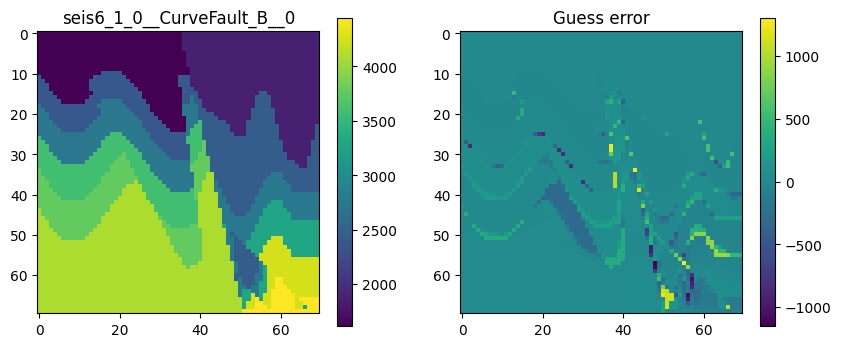

diag 3.250623900849397e-05
vel_to_seis time: 105.51
outside cost_and_gradient_func: 1736.83
total iteration time: 1847.33

vel_to_seis time: 107.08
outside cost_and_gradient_func: 5.00
total iteration time: 115.08

vel_to_seis time: 106.06
outside cost_and_gradient_func: 2.00
total iteration time: 111.06

vel_to_seis time: 106.02
outside cost_and_gradient_func: 2.00
total iteration time: 111.14

vel_to_seis time: 106.03
outside cost_and_gradient_func: 1.00
total iteration time: 111.03

vel_to_seis time: 106.02
outside cost_and_gradient_func: 2.00
total iteration time: 111.02

vel_to_seis time: 111.51
outside cost_and_gradient_func: 2.00
total iteration time: 116.51

vel_to_seis time: 110.51
outside cost_and_gradient_func: 2.00
total iteration time: 116.51

vel_to_seis time: 106.09
outside cost_and_gradient_func: 2.00
total iteration time: 112.09

vel_to_seis time: 105.05
outside cost_and_gradient_func: 2.00
total iteration time: 110.05

vel_to_seis time: 106.04
outside cost_and_gradien

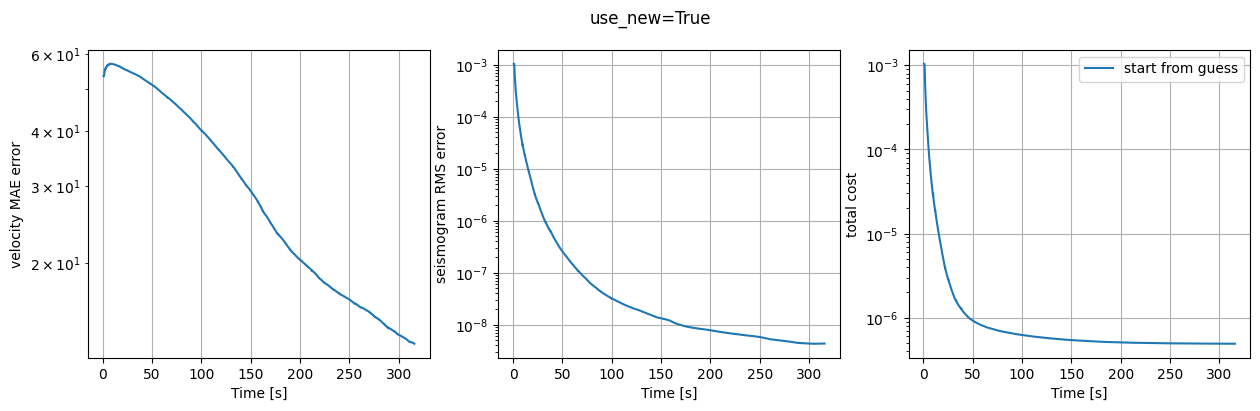

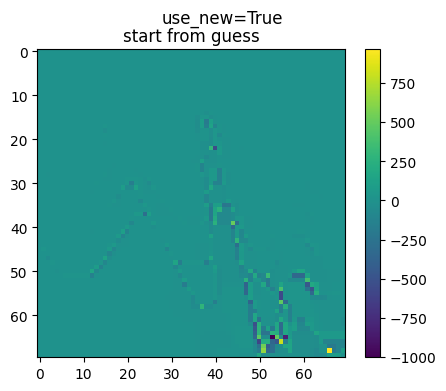

diag 3.250623900849397e-05
vel_to_seis time: 105.05
outside cost_and_gradient_func: 1965.71
total iteration time: 2075.76

vel_to_seis time: 105.05
outside cost_and_gradient_func: 0.00
total iteration time: 108.05

vel_to_seis time: 105.58
outside cost_and_gradient_func: 1.00
total iteration time: 109.58

vel_to_seis time: 103.56
outside cost_and_gradient_func: 1.00
total iteration time: 107.56

vel_to_seis time: 105.06
outside cost_and_gradient_func: 1.00
total iteration time: 110.06

vel_to_seis time: 105.05
outside cost_and_gradient_func: 1.00
total iteration time: 109.05

vel_to_seis time: 106.21
outside cost_and_gradient_func: 1.00
total iteration time: 110.21

vel_to_seis time: 104.92
outside cost_and_gradient_func: 1.00
total iteration time: 107.92

vel_to_seis time: 105.06
outside cost_and_gradient_func: 2.00
total iteration time: 110.06

vel_to_seis time: 105.73
outside cost_and_gradient_func: 1.00
total iteration time: 109.72

vel_to_seis time: 106.51
outside cost_and_gradien

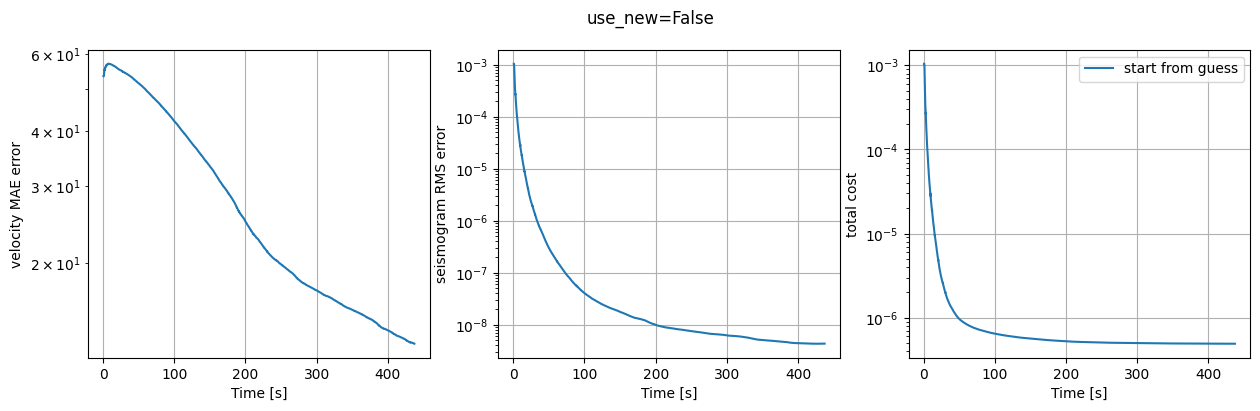

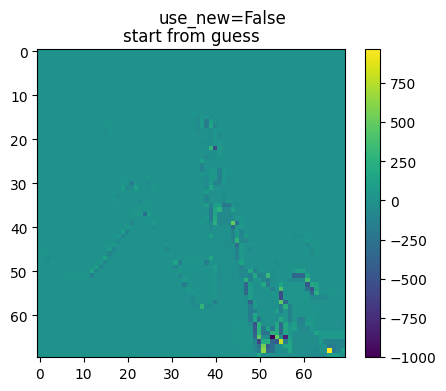

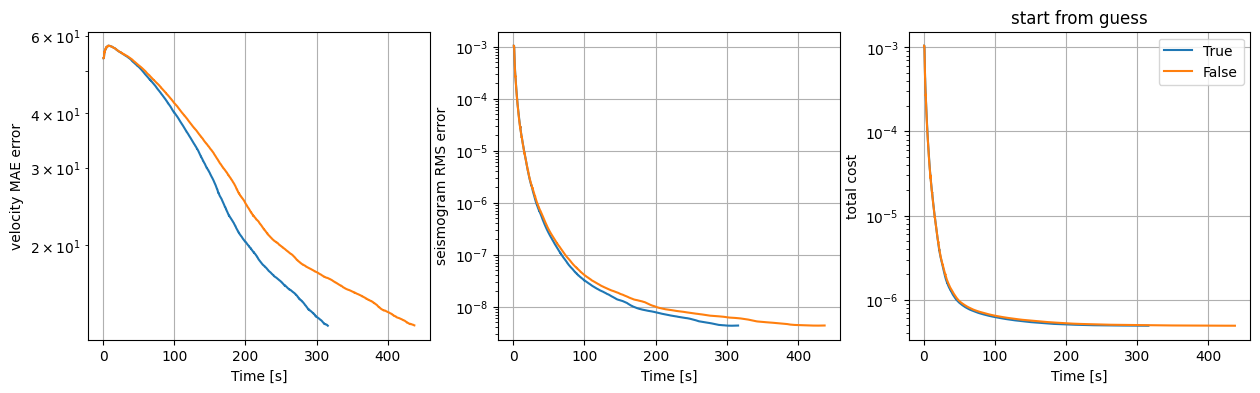

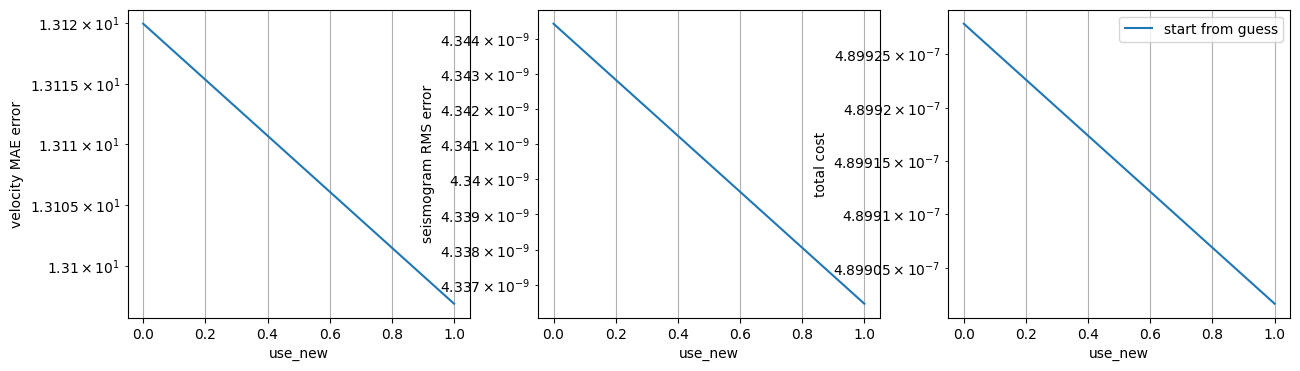

In [10]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
importlib.reload(seis_numerics)
kgs.profiling=False
seis_invert.profiling=True
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_model.model_TV2D()
model.show_convergence = True
#model.iter_list = [10]

do_which_list = [False,False,True]

def param_func(model,value):    
    model.use_new_bfgs=value
    return model
    
param_values = [True,False]
param_name = "use_new"


for d in data[500:501]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)

In [12]:
25.7-(25.7-25.2)*64/3

15.033333333333333

In [14]:
2189/3000

0.7296666666666667

In [15]:
5*65000*0.09/60/8/24

2.5390625